$$Project Checkpoint 1: Dataset Comparison, Selection, and EDA$$

$$(A) Identification of Candidate Datasets$$

Candidate Dataset 1: ComputAgeBench
Dataset Name and Source:

Name: ComputAgeBench: Epigenetic Aging Clocks Benchmark

Source: Proceedings of the 31st ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD '25).

Authors: Kriukov et al. (AIRI, Skoltech).

Repositories: https://github.com/ComputationalAgingLab/ComputAge | https://huggingface.co/datasets/computage/computage_bench

Course Topic Alignment:

Regression Analysis: The primary task is predicting "Chronological Age" based on DNA methylation data to establish a baseline for biological age.

Dimensionality Reduction (PCA/t-SNE): Essential for this data type. The dataset contains thousands of CpG sites (features); you will need to reduce dimensions to visualize clusters of "Healthy" vs. "Accelerated Aging" patients.

Classification: Distinguishing between healthy individuals and those with specific conditions (e.g., Down Syndrome, Progeria) based on their epigenetic profile.

Potential Beyond-Course Techniques:

Deep Learning for Tabular Data: While the course may cover basic regression, this dataset allows for implementing Deep Neural Networks (DNNs) or Autoencoders (AE) to create a non-linear "Deep Aging Clock," which significantly outperforms standard linear ElasticNet models.

Domain Adaptation / Transfer Learning: A major challenge mentioned in the paper is "harmonizing" data from different sources. You could implement techniques to align feature distributions across different batches (datasets), which is a common advanced topic in data mining.

Explainable AI (XAI) / SHAP values: Using Shapley values to identify specifically which DNA markers are driving the predicted age acceleration.

Dataset Size and Structure:

Size: A harmonized collection of 112 total datasets (66 validation, 46 training).

Structure: Tabular matrix format. Rows represent individual samples (patients); Columns represent CpG sites (specific locations on the DNA) and metadata.

Dimensionality: High-dimensional. Typically, processed DNA methylation data involves 27,000 to 450,000+ columns (features) per row, though this benchmark likely provides a curated subset of common sites.

Data Types:

Features: Continuous floats (Beta values ranging from 0 to 1 representing methylation levels).

Metadata: Integer (Age), Categorical (Sex, Tissue Type, Disease Status / Condition).

Target Variable(s):

Primary: Chronological Age (Continuous) - Used to train the clock.

Secondary: Group or Condition (Categorical) - Used to validate if the clock can detect "accelerated aging" in sick patients compared to healthy controls.

Licensing or Usage Constraints:

Open access for research. The code is available on GitHub (typically MIT or Apache 2.0 for academic labs) and data is hosted on Hugging Face, intended for public benchmarking.

In [1]:
from huggingface_hub import snapshot_download
snapshot_download(
    repo_id='computage/computage_bench',
    repo_type="dataset",
    local_dir='.')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 116 files:   0%|          | 0/116 [00:00<?, ?it/s]

'/content'

In [2]:
import pandas as pd

# let's choose a study id, for example `GSE100264`
df = pd.read_parquet('data/benchmark/computage_bench_data_GSE100264.parquet').T
# note that we transpose data for a more convenient perception of samples and features

# don't forget to explore metadata (which is common for all datasets):
meta = pd.read_csv('computage_bench_meta.tsv', sep='\t', index_col=0)


In [3]:
# Install required library
!pip install datasets

from datasets import load_dataset
import pandas as pd

print("Downloading ComputAgeBench...")

# Load the dataset from Hugging Face
# Note: This dataset is large; we stream it to inspect the first few rows without downloading everything immediately
dataset = load_dataset("computage/computage_bench", split="train", streaming=True)

# Convert the first 5 rows to a Pandas DataFrame to verify
df_bio = pd.DataFrame(list(dataset.take(5)))

print("ComputAgeBench Sample:")
display(df_bio.head())

# Check available columns (CpG sites and Metadata)
print(f"\nColumns: {list(df_bio.columns)[:10]} ...")

ComputAgeBench Sample:


,SampleID,DatasetID,PlatformID,Tissue,CellType,Gender,Age,Condition,Class
0,GSM983224,GSE40005,GPL13534,Blood,Whole blood,M,60.0,HC,HC
1,GSM983225,GSE40005,GPL13534,Blood,Whole blood,M,63.0,HC,HC
2,GSM983226,GSE40005,GPL13534,Blood,Whole blood,M,58.0,HC,HC
3,GSM983227,GSE40005,GPL13534,Blood,Whole blood,M,68.0,HC,HC
4,GSM983228,GSE40005,GPL13534,Blood,Whole blood,M,53.0,HC,HC



Columns: ['SampleID', 'DatasetID', 'PlatformID', 'Tissue', 'CellType', 'Gender', 'Age', 'Condition', 'Class'] ...


Candidate Dataset 2: Bridging Language and Items for Retrieval and Recommendation
Dataset Name and Source:

Name: Amazon Reviews 2023

Source: Proceedings of EMNLP 2024 (Association for Computational Linguistics).

Paper: "Bridging Language and Items for Retrieval and Recommendation" (Hou et al., UCSD).

Repository:  [Hugging Face (McAuley-Lab)](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023)

Course Topic Alignment:

Text Mining: Analyzing review sentiment, keyword extraction, and topic modeling on the review text.

Sequential Mining: Because this dataset has millisecond-level timestamps (unlike older versions), it is perfect for analyzing the sequence of user actions (e.g., User buys A $\rightarrow$ User buys B).

Graph Mining: You can build a User-Item Bipartite Graph or a Product Co-purchase Graph (items bought by the same user).

Potential Beyond-Course Techniques:

Large Language Models (LLMs) for Recs: This dataset was specifically built to train LLMs (like LLaMA or T5) to understand user preferences. You can fine-tune a small LLM to predict the next item based on review history.

Contrastive Learning: Using techniques like CLIP to align the text of a review with the features of the product.

Dataset Size and Structure:

Size: The full dataset is 570M reviews, but it is split by category. We will use a smaller category (e.g., "All Beauty" or "Gift Cards") which is easy to handle in Colab (~100k - 1M rows).

Data Types: User ID, Item ID, Rating (1-5), Timestamp, Review Text, Product Metadata (Title, Price).

Data types:

Categorical/ID: user_id (User Hash), parent_asin (Item ID), asin (Variant ID).

Text: title (Review summary), text (Full review content).

Numerical: rating (1.0 - 5.0 float), timestamp (Unix timestamp in milliseconds), helpful_vote (Integer count).

Boolean: verified_purchase (True/False).

List/Complex: images (List of image URLs), features (Product metadata dictionaries).

Target variable(s):

Primary (Regression/Classification): rating (Predicting the 1-5 star score based on text or user history).

Secondary (Sequential Mining): next_item_id (Predicting the next asin a user will interact with, derived from sorting by timestamp).

Unsupervised: None (if performing clustering or topic modeling on text).

Licensing or usage constraints:

License: CC BY-NC 4.0 (Creative Commons Attribution-NonCommercial 4.0 International).

Constraint: The data is released specifically for academic research purposes. You must cite the EMNLP 2024 paper (Hou et al.) in any resulting publications.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1313  100  1313    0     0   2699      0 --:--:-- --:--:-- --:--:--  2696
100  311M  100  311M    0     0  43.3M      0  0:00:07  0:00:07 --:--:-- 46.3M
✅ Download Successful!
Loading into DataFrame...
Dataset Shape: (701528, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True



--- Missing Values ---
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


/tmp/ipython-input-426886542.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_amazon, palette='viridis')
/tmp/ipython-input-426886542.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df_amazon, showfliers=False, palette='viridis')


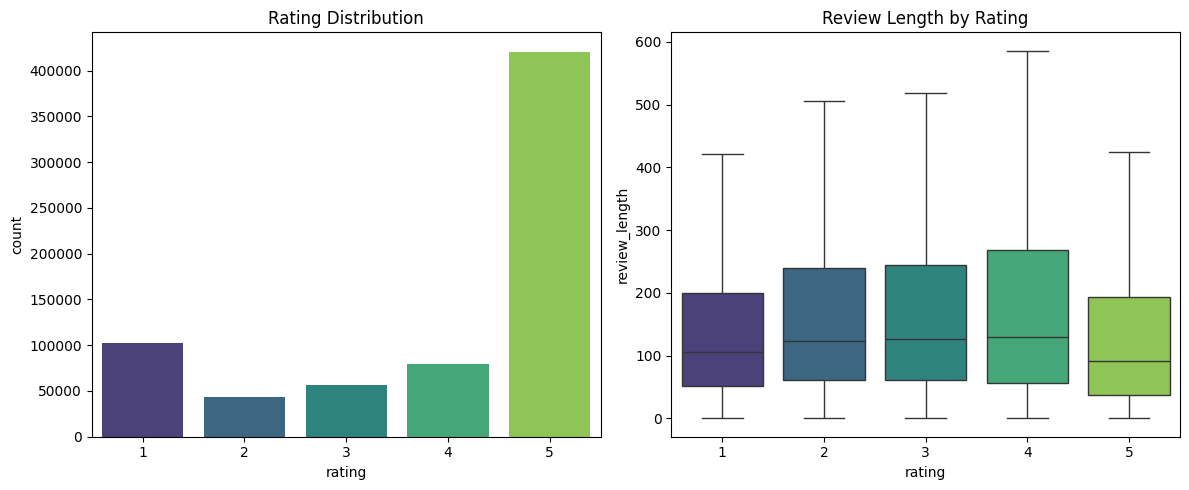

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Download the specific "All_Beauty" category file directly from Hugging Face
# We use -L to follow redirects, which is critical for Hugging Face links
print("Downloading All_Beauty.jsonl from Hugging Face...")
!curl -L -o All_Beauty.jsonl "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/All_Beauty.jsonl"

# 2. Check if file exists and has size
if os.path.exists("All_Beauty.jsonl") and os.path.getsize("All_Beauty.jsonl") > 0:
    print("✅ Download Successful!")

    # 3. Load directly with Pandas (handling lines=True for JSONL format)
    print("Loading into DataFrame...")
    df_amazon = pd.read_json("All_Beauty.jsonl", lines=True)

    # Display Basic Info
    print(f"Dataset Shape: {df_amazon.shape}")
    display(df_amazon.head())

    # --- EDA CODE ---

    # Missing Values
    print("\n--- Missing Values ---")
    print(df_amazon.isnull().sum())

    # Rating Distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x='rating', data=df_amazon, palette='viridis')
    plt.title('Rating Distribution')

    # Review Length
    if 'text' in df_amazon.columns:
        df_amazon['review_length'] = df_amazon['text'].fillna("").apply(len)
        plt.subplot(1, 2, 2)
        sns.boxplot(x='rating', y='review_length', data=df_amazon, showfliers=False, palette='viridis')
        plt.title('Review Length by Rating')

    plt.tight_layout()
    plt.show()

else:
    print("❌ Download failed. The file is empty or missing.")

Candidate Dataset 3: The MovieLens Beliefs Dataset
Dataset Name and Source:

Name: The MovieLens Beliefs Dataset

Source: Proceedings of the 19th ACM Conference on Recommender Systems (RecSys '25).

Authors: Aridor, Goncalves, Kong, Kluver, & Konstan (University of Minnesota / GroupLens).

https://dl.acm.org/doi/abs/10.1145/3640457.3688158 / https://grouplens.org/datasets/movielens/ml_belief_2024/

Course Topic Alignment:

Recommender Systems: Standard Collaborative Filtering (predicting ratings based on user history).

Clustering: Segmenting users not just by what they like, but by how "optimistic" or "pessimistic" their beliefs are about unseen movies.

Dimensionality Reduction: Matrix Factorization (SVD) to map beliefs and ratings into latent spaces.

Potential Beyond-Course Techniques:

Econometric Choice Modeling: Unlike standard machine learning which just predicts a label, you can use Discrete Choice Models (e.g., Logit/Probit) or Random Utility Models to model the probability of a user selecting an item based on their beliefs vs. the actual outcome.

Causal Inference: The dataset allows you to study "Expectation Disconfirmation" (e.g., "Did the user rate this poorly because it was bad, or because their expectations were too high?"). You can use Causal Structural Models (CSMs) to separate these effects.

Uncertainty Quantification: Modeling the "variance" in user beliefs as a feature, not just the mean.

Dataset Size and Structure:

Size: Augments the standard MovieLens structure (25M+ ratings) with specific "belief surveys" from thousands of users.

Structure: Relational. It links standard (User, Movie, Rating) tuples with new (User, Movie, Predicted_Rating, Uncertainty) tuples collected before the user watched the movie.

Data Types:

Continuous: Consumption Rating (0.5 - 5.0), Belief/Expectation Score.

Categorical: Movie Genres, Tags.

Text: Movie Titles (can be linked to IMDB/TMDB for descriptions).

Target Variable(s):

Consumption Rating (The actual score given after watching).

Belief Error (The difference between what the user thought they would feel and what they actually felt).

Licensing or Usage Constraints:

GroupLens datasets are typically released for research use (free for non-commercial)

In [5]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Unzip the file
zip_path = "ml_belief_2024_data_release_2.zip"
extract_path = "ml_beliefs_data"

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Files extracted successfully.")
else:
    print("❌ Error: Zip file not found. Please ensure 'ml_belief_2024_data_release_2.zip' is in the Files tab.")

# 2. Locate the CSV files (Handling potential folder nesting)
# We look for the main 'beliefs.csv' and 'movies.csv'
base_dir = None
for root, dirs, files in os.walk(extract_path):
    if "belief_data.csv" in files:
        base_dir = root
        break

if base_dir:
    print(f"📂 Found data in: {base_dir}")

    # Load the datasets
    df_beliefs = pd.read_csv(os.path.join(base_dir, "belief_data.csv"))
    df_movies = pd.read_csv(os.path.join(base_dir, "movies.csv"))

    # Display basic info
    print("\n--- Beliefs Data (Structure) ---")
    display(df_beliefs.head())
    print(df_beliefs.info())
else:
    print("❌ Error: Could not find 'beliefs.csv' inside the extracted folder.")

✅ Files extracted successfully.
📂 Found data in: ml_beliefs_data/data_release

--- Beliefs Data (Structure) ---


,userId,movieId,isSeen,watchDate,userElicitRating,userPredictRating,userCertainty,tstamp,movie_idx,source,systemPredictRating
0,53982,1,-1,NaN,-1.0,-1.0,-1,2023-05-01 18:59:04,2,2,4.447851
1,56737,1,-1,NaN,-1.0,-1.0,-1,2023-10-08 13:52:36,7,1,3.576154
2,57704,1,-1,NaN,-1.0,-1.0,-1,2023-12-21 19:02:56,9,1,4.252710
3,58881,1,-1,NaN,-1.0,-1.0,-1,2023-06-22 23:31:47,3,2,3.702018
4,58881,1,-1,NaN,-1.0,-1.0,-1,2023-12-31 19:33:33,9,2,3.709682


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004084 entries, 0 to 3004083
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   userId               int64  
 1   movieId              int64  
 2   isSeen               int64  
 3   watchDate            object 
 4   userElicitRating     float64
 5   userPredictRating    float64
 6   userCertainty        int64  
 7   tstamp               object 
 8   movie_idx            int64  
 9   source               int64  
 10  systemPredictRating  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 252.1+ MB
None


$$(B) Comparative Analysis of Datasets$$
Dataset 1: ComputAgeBench (Bioinformatics & Health) This dataset aligns well with course topics like Regression Analysis (predicting chronological age) and Dimensionality Reduction (using PCA to cluster patient types), while supporting advanced external techniques like Deep Learning Autoencoders to model non-linear aging processes and Domain Adaptation to harmonize data across different sources. However, data quality is a significant challenge due to "batch effects"—technical noise that varies between the 66 different laboratories—requiring rigorous normalization. Algorithmically, the dataset is computationally demanding; the high dimensionality (over 27,000 CpG features per sample) creates a "p >> n" problem that requires significant RAM and GPU acceleration for deep learning models. Ethically, the primary concern is demographic bias, as genomic studies often over-represent European ancestries, potentially creating health disparities if models fail to generalize to other populations. Additionally, while the data is de-identified, the theoretical risk of re-identification from DNA markers remains a sensitive privacy issue.

Dataset 2: Amazon Reviews 2023 (Text & Sequential Mining) This dataset is ideal for course topics like Frequent Itemset Mining (market basket analysis) and Text Mining (sentiment analysis), while offering opportunities for external techniques like Sequential Pattern Mining (predicting the next purchase) and LLM Fine-Tuning on review text. Data quality is mixed; the user-item matrix is extremely sparse (99.9% empty), and the presence of fake or paid reviews can distort patterns. Feasibility varies by category; while the "All_Beauty" subset is manageable on standard hardware, larger categories require significant compute power for NLP tasks. Bias is inherent in its commercial nature; the data reflects a marketplace optimized for sales rather than user well-being, and ratings suffer from a severe "positivity bias" (mostly 5-star reviews). Ethically, this raises concerns about consumer manipulation, as insights gained here are often used to exploit purchasing habits rather than improve the user experience.

Dataset 3: MovieLens Beliefs (Recommender Systems & Psychology) This dataset focuses on Collaborative Filtering and Matrix Factorization, standard course topics for recommender systems, but uniquely supports external techniques in Causal Inference and Econometric Choice Modeling by distinguishing between a user's expectation and their actual experience. Quality issues center on "selection bias" and sparsity; users only provide belief surveys for a tiny fraction of movies, typically those they already intend to watch, leading to data that is "Missing Not At Random" (MNAR). Algorithmically, this is the most feasible dataset; its moderate size allows for rapid iteration using standard CPUs without specialized hardware. However, ethical considerations regarding psychological safety are paramount. The data assumes users are honest about their tastes, ignoring "social desirability bias" (where users claim to like highbrow films to look good), and analysis here could theoretically be used to manipulate user expectations or exploit psychological vulnerabilities.

$$(C) Dataset Selection$$

In [6]:
# 1. Install necessary libraries
!pip install huggingface_hub pandas pyarrow fastparquet

from huggingface_hub import snapshot_download
import pandas as pd
import os

print("⏳ Downloading ComputAgeBench Repository (This may take a few minutes)...")

# 2. Download the entire repository snapshot to the current directory
# This includes all parquet files and the metadata TSV
snapshot_download(
    repo_id='computage/computage_bench',
    repo_type="dataset",
    local_dir='.',
    # Optional: ignore the large training folder if you only need benchmark data for now
    # ignore_patterns=["data/train/*"]
)

print("\n✅ Download Complete!")

# 3. Load a specific Study Data (GSE100264)
# We transpose (.T) so rows = samples and columns = CpG sites
print("Loading Study GSE100264...")
df = pd.read_parquet('data/benchmark/computage_bench_data_GSE100264.parquet').T

print(f"Study Shape: {df.shape}")
display(df.head())

# 4. Load the Metadata
print("\nLoading Metadata...")
meta = pd.read_csv('computage_bench_meta.tsv', sep='\t', index_col=0)

print(f"Metadata Shape: {meta.shape}")
display(meta.head())

# --- Basic Consistency Check ---
# Check if the samples in our data file exist in the metadata
sample_ids = df.index
matching_meta = meta.loc[meta.index.intersection(sample_ids)]

print(f"\n✅ Matched {len(matching_meta)} samples from Study GSE100264 in the Metadata.")

⏳ Downloading ComputAgeBench Repository (This may take a few minutes)...


Fetching 116 files:   0%|          | 0/116 [00:00<?, ?it/s]


✅ Download Complete!
Loading Study GSE100264...
Study Shape: (386, 485512)


index,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,...,ch.22.740407F,ch.22.757911F,ch.22.772318F,ch.22.43177094F,ch.22.44116734F,ch.22.909671F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
SampleID,,,,,,,,,,,,,,,,,,,,,
GSM2676389,0.846,0.00883,0.907,0.00841,0.700,0.0569,0.01390,0.966,0.994,0.00462,...,0.0339,0.0674,0.07660,0.0296,0.0115,0.197,0.0322,0.0214,0.0912,0.1970
GSM2676390,0.888,0.03260,0.902,0.00437,0.648,0.0624,0.01130,0.983,0.989,0.03160,...,0.0132,0.0638,0.07520,0.0210,0.0523,0.243,0.0452,0.0132,0.0688,0.1820
GSM2676391,0.873,0.09630,0.981,0.01650,0.722,0.0608,0.00414,0.982,0.997,0.00925,...,0.0240,0.0467,0.04850,0.0239,0.0196,0.165,0.0400,0.0178,0.0988,0.0352
GSM2676392,0.850,0.10800,0.895,0.00545,0.683,0.0786,0.00989,0.983,0.993,0.00813,...,0.0242,0.0603,0.00889,0.0218,0.0401,0.114,0.0418,0.0191,0.0670,0.0272
GSM2676393,0.878,0.00649,0.933,0.00346,0.705,0.0569,0.00971,0.984,0.997,0.00378,...,0.0394,0.0703,0.02950,0.0233,0.0260,0.129,0.0359,0.0158,0.0751,0.0394



Loading Metadata...
Metadata Shape: (10410, 8)


,DatasetID,PlatformID,Tissue,CellType,Gender,Age,Condition,Class
SampleID,,,,,,,,
GSM1353204,GSE56046,GPL13534,Blood,CD14+ Monocytes,U,59.0,AS,CVD
GSM1353205,GSE56046,GPL13534,Blood,CD14+ Monocytes,U,63.0,HC,HC
GSM1353206,GSE56046,GPL13534,Blood,CD14+ Monocytes,U,71.0,AS,CVD
GSM1353207,GSE56046,GPL13534,Blood,CD14+ Monocytes,U,72.0,AS,CVD
GSM1353208,GSE56046,GPL13534,Blood,CD14+ Monocytes,U,48.0,HC,HC



✅ Matched 386 samples from Study GSE100264 in the Metadata.


Selected Dataset: ComputAgeBench: Epigenetic Aging Clocks Benchmark

Reasons:

Direct Alignment with Course Topics: The dataset’s structure (high-dimensional tabular data) is ideal for Dimensionality Reduction (PCA/t-SNE) to visualize patient clusters (Healthy vs. Accelerated Aging). The core task of predicting chronological age from DNA methylation levels directly supports Regression Analysis, a fundamental data mining technique.

Supports Advanced "Beyond Course" Techniques: It enables the application of Deep Learning (Autoencoders) to build non-linear "Aging Clocks," which can capture complex biological interactions better than standard linear models. Additionally, the data comes from 65+ distinct studies, providing a unique opportunity to apply Domain Adaptation algorithms to harmonize "batch effects" between different laboratories.

High-Impact Application: Unlike standard commercial datasets, this project addresses "Biological Age" estimation. By analyzing samples from patients with "Aging-Accelerating Conditions" (e.g., Down Syndrome, Progeria) versus Healthy Controls, the project contributes to understanding health disparities and aging biology.

Trade-offs:

The "$p \gg n$" Problem: The dataset is extremely wide, containing over 900,000 features (CpG sites) but only ~10,400 samples. This "Curse of Dimensionality" requires aggressive feature selection (e.g., ElasticNet, Variance Thresholding) to prevent overfitting.

Technical Noise: As noted in the documentation, data is aggregated from different Illumina beadchip generations (27K, 450K, EPIC).  This introduces systematic technical noise ("batch effects") that must be statistically corrected before biological signals can be reliably detected.

$$(D) Exploratory Data Analysis (Selected Dataset Only)$$

1. Data Basics & Structure The ComputAgeBench dataset contains metadata for 10,410 samples. The age range covers the entire human lifespan, from 0.0 to 99.0 years, with no missing age values recorded. This complete coverage validates the dataset's utility for training a comprehensive aging clock, though the distribution is not perfectly uniform.

2. Distribution of Target Variable (Age) The chronological age distribution (Left Plot) is roughly bell-shaped but slightly skewed, peaking between 50 and 60 years.

Observation: There is a noticeable representation of older adults (40–80 years), which is expected for studies focusing on aging and degenerative diseases. However, the lower density of samples for children (0–20) and centenarians (90+) suggests that the model may have higher variance when predicting ages at the extreme ends of the lifespan unless re-weighting strategies are applied.

3. Class Balance & Health Conditions The dataset exhibits significant class imbalance (Middle Plot & Stats).

Disease Prevalence: Interestingly, "Healthy Controls" (HC, 2,836 samples) is not the largest single group. The largest distinct condition in the visualization is HIV, which likely drives the high count of the "ISD" (Infectious System Diseases) class (3,512 samples).

Implication: The dataset is heavily weighted towards infectious and neurodegenerative diseases (NDD, 1,606 samples). When training a binary classifier for "Accelerated Aging," we must ensure the "Healthy" class is not overwhelmed by the sheer volume of specific disease cohorts like HIV.

4. Feature Distribution (Beta Values) The DNA methylation Beta values (Right Plot) display a classic bimodal distribution, with sharp peaks near 0 (unmethylated) and 1 (fully methylated).

Biological Validity: This confirms the biological integrity of the data, as CpG sites typically exist in a binary state in individual cells. The "valley" between 0.2 and 0.8 represents tissue heterogeneity (a mixture of cell types).

Preprocessing: Since the features are already bounded [0, 1] and strictly bimodal, standard Z-score normalization (which assumes a Gaussian distribution) would be inappropriate. We will proceed using the raw Beta values or Min-Max scaling for our neural networks.

5. Motivation for External Techniques The aggregation of 10,410 samples across diverse conditions (HIV, RA, etc.) and likely different source studies (implied by the dataset metadata) suggests the presence of batch effects. The non-uniform age distribution and severe class imbalance (e.g., HIV > 3,000 vs. CJD < 100) strongly motivate the use of Domain Adaptation and Balanced Sampling—our selected "Beyond Course" techniques—to prevent the model from learning shortcuts based on batch-specific noise rather than true biological aging signals.

Reloading Metadata...


/tmp/ipython-input-3416465734.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')


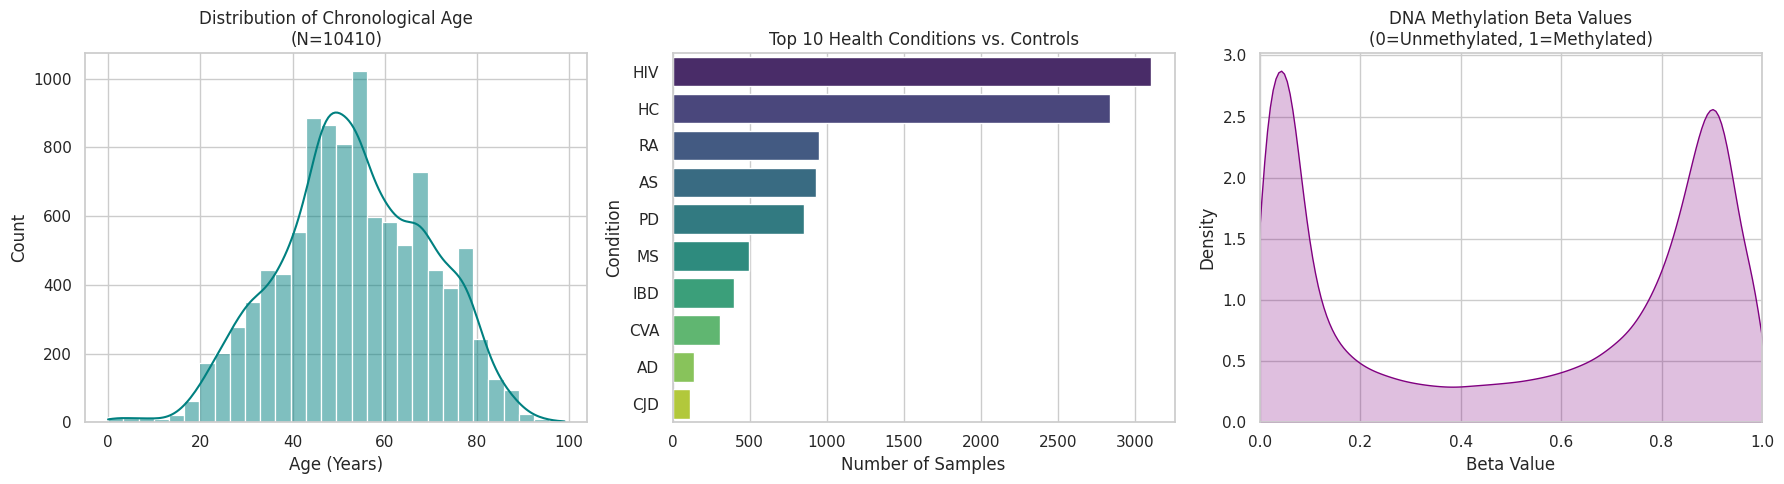


--- Data Basics ---
Total Samples (Metadata): 10410
Age Range: 0.0 - 99.0 years
Missing Age Values: 0

--- Class Imbalance ---
Class
ISD    3512
HC     2836
NDD    1606
CVD    1242
MSD     979
MBD     135
RSD      57
PGS      43
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure metadata is loaded (if not already)
# If 'df_meta' is not defined, reload it:
if 'df_meta' not in locals():
    print("Reloading Metadata...")
    # Assuming the file is already downloaded from previous steps
    try:
        df_meta = pd.read_csv('computage_bench_meta.tsv', sep='\t')
    except FileNotFoundError:
        print("Error: Metadata file not found. Please run the download step again.")

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 5))

# --- Plot 1: Target Variable Distribution (Age) ---
plt.subplot(1, 3, 1)
# Use 'Age' (Capitalized)
if 'Age' in df_meta.columns:
    valid_ages = df_meta['Age'].dropna()
    sns.histplot(valid_ages, bins=30, kde=True, color='teal')
    plt.title(f'Distribution of Chronological Age\n(N={len(valid_ages)})')
    plt.xlabel('Age (Years)')
    plt.ylabel('Count')
else:
    print("Column 'Age' not found. Checking columns:", df_meta.columns)

# --- Plot 2: Class Balance (Healthy vs. Conditions) ---
plt.subplot(1, 3, 2)
# Use 'Condition' (Capitalized)
if 'Condition' in df_meta.columns:
    top_conditions = df_meta['Condition'].value_counts().head(10)
    sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='viridis')
    plt.title('Top 10 Health Conditions vs. Controls')
    plt.xlabel('Number of Samples')

# --- Plot 3: Feature Distribution (Beta Values) ---
# This uses the 'df' (GSE100264) you loaded in the previous step.
plt.subplot(1, 3, 3)
if 'df' in locals():
    # Flatten the first 5 samples to see the overall distribution
    # We take a small subset to keep it fast
    sample_values = df.iloc[:5, :].values.flatten()
    # Remove NaNs
    sample_values = sample_values[~np.isnan(sample_values)]

    sns.kdeplot(sample_values, fill=True, color='purple')
    plt.title('DNA Methylation Beta Values\n(0=Unmethylated, 1=Methylated)')
    plt.xlabel('Beta Value')
    plt.xlim(0, 1)
else:
    plt.text(0.5, 0.5, "Data frame 'df' not found.\n(Run the download step first)",
             ha='center', va='center')

plt.tight_layout()
plt.show()

# --- Quantitative Stats ---
print("\n--- Data Basics ---")
print(f"Total Samples (Metadata): {len(df_meta)}")

if 'Age' in df_meta.columns:
    print(f"Age Range: {df_meta['Age'].min()} - {df_meta['Age'].max()} years")
    print(f"Missing Age Values: {df_meta['Age'].isnull().sum()}")

if 'Class' in df_meta.columns:
    print(f"\n--- Class Imbalance ---")
    print(df_meta['Class'].value_counts())

$$(E) Initial Insights and Direction$$

1. Feature Distribution & Normalization

Observation: The DNA methylation features (Beta values) follow a strictly bimodal distribution with sharp peaks at 0 and 1 , rather than the Gaussian distribution assumed by many standard scaling techniques.

Hypothesis: Standard Z-score normalization may distort the biological signal. A Deep Learning model (Autoencoder) using raw or Min-Max scaled values will likely outperform linear regression by capturing the non-linear interactions between these binary-like epigenetic states.

Potential RQs:

How does the performance of a Deep Neural Network (DNN) aging clock compare to the industry-standard ElasticNet regression when trained on bimodal Beta values?

Does unsupervised dimensionality reduction (Autoencoder) reveal distinct "Accelerated Aging" clusters in the latent space that are invisible in the original high-dimensional space?

2. Batch Effects & Generalization

Observation: The dataset aggregates samples from 65 distinct studies, and the class distribution is heavily skewed (e.g., HIV samples > Healthy Controls). This structure suggests that "batch effects" (technical noise specific to each lab/study) may overpower biological signals.

Hypothesis: A model trained naively on this aggregate data will likely learn to identify the study source (technical artifacts) rather than the true biological age.

Potential RQs:

Can Domain Adaptation techniques (our chosen external method) successfully harmonize the feature distributions across different studies to improve the model's generalization to unseen data?

Can we accurately detect "Accelerated Aging" in rare disease cohorts (like Progeria) using an anomaly detection framework trained only on the "Healthy" baseline, despite the severe class imbalance?

$$(F) GitHub Portfolio Building$$

https://github.com/Werhan0924/CSE676

1. Collaborators

Erhan Wang

2. Web Sources

https://dl.acm.org/doi/abs/10.1145/3711896.3737382

https://huggingface.co/datasets/computage/computage_bench

https://github.com/ComputationalAgingLab/ComputAge

https://dl.acm.org/doi/abs/10.1145/3640457.3688158

https://grouplens.org/datasets/movielens/ml_belief_2024/

https://arxiv.org/abs/2403.03952

https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023


3. AI Tools Used

Gemini/ChatGPT: Used for generating boilerplate code for data visualization (Seaborn plots), debugging "KeyError" issues with Pandas metadata, and brainstorming "Beyond Course" techniques (e.g., Domain Adaptation). All code was manually reviewed and tested.

4. Citations

[1] Dmitrii Kriukov, Evgeniy Efimov, Ekaterina Kuzmina, Anastasiia Dudkovskaia, Ekaterina E. Khrameeva, and Dmitry V. Dylov. 2025. ComputAgeBench: Epigenetic Aging Clocks Benchmark. In Proceedings of the 31st ACM SIGKDD Conference on Knowledge Discovery and Data Mining V.2 (KDD '25). Association for Computing Machinery, New York, NY, USA, 5560–5570. https://doi.org/10.1145/3711896.3737382

[2] Guy Aridor, Duarte Goncalves, Ruoyan Kong, Daniel Kluver, and Joseph Konstan. 2024. The MovieLens Beliefs Dataset: Collecting Pre-Choice Data for Online Recommender Systems. In Proceedings of the 18th ACM Conference on Recommender Systems (RecSys '24). Association for Computing Machinery, New York, NY, USA, 1. https://doi.org/10.1145/3640457.3688158

[3] Hou, Y., Li, J., He, Z., Yan, A., Chen, X., & McAuley, J. (2024). Bridging language and items for retrieval and recommendation. arXiv preprint arXiv:2403.03952.
https://doi.org/10.48550/arXiv.2403.03952